# Exploracion de indicadores de pobreza a nivel municipal
##### José Angel Alejandro Soto
##### Angel Gilberto Ayala Pérez

#### Introducción
Para llevar a cabo este proyecto, descargamos las bases de datos y agrupamos los municipios usando K-Means.

El objetivo es comparar nuestros resultados con los datos de marginación según el gobierno, y así verificar la fiabilidad de estos últimos.

Nos limitamos a los municipios del estado de Guanajuato.

Es importante destacar que nuestro análisis nos indica marginación de forma relativa, respecto al resto de municipios comparados. Es decir, si comparamos únicamente ciudades con calidad de vida alta, nos saldrá que la marginación de algunas ciudades es mayor que de otras, lo cual no necesariamente quiere decir que tengan mucha pobreza, sino que, "en comparación a las demás", tienen mayor pobreza. Mientras que los grados de marginación según el gobierno, sí indican la existencia de mucha/poca pobreza.

Los análisis (con sus respectivas conclusiones) se encuentran a partir del apartado "Clase que lleva a cabo el analisis".

#### Librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 1.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


#### Cargando datos 2020

In [ ]:
data_2020 = pd.read_excel('IMM_2020.xls')
temp_columns = data_2020.columns

nombre_columnas_completos = []
nombre_columnas_abreviados = []
contenido_por_columna = []

for curr_column in temp_columns:
  temp = [a[0] for a in data_2020[ [curr_column] ].values]

  nombre_columnas_completos += [temp[2]]
  nombre_columnas_abreviados += [temp[4]]
  contenido_por_columna += [temp[7:-2]]

FileNotFoundError: ignored

In [ ]:
print(nombre_columnas_completos)
print(nombre_columnas_abreviados)

In [ ]:
data_2020 = pd.DataFrame(contenido_por_columna).transpose()
# Se puede reemplazar nombre_columnas_completos por nombre_columnas_abreviados
data_2020.rename(columns={key:value for key, value in zip(data_2020.columns, nombre_columnas_completos)} , inplace=True)

In [ ]:
data_2020

#### Cargando datos 1990 - 2015

In [ ]:
data_1990_2015 = pd.read_csv('Base_Indice_de_marginacion_municipal_90-15.csv', encoding='latin-1')

In [ ]:
data_1990_2015

,CVE_ENT,ENT,CVE_MUN,MUN,POB_TOT,VP,ANALF,SPRIM,OVSDE,OVSEE,...,PL<5000,PO2SM,OVSD,OVSDSE,IM,GM,IND0A100,LUG_NAC,LUGAR_EST,AÑO
0,1,Aguascalientes,1001,Aguascalientes,877190,-,2.06,9.54,0.31,0.16,...,8.73,31.13,-,-,-1.676,Muy bajo,-,2408,11,2015
1,1,Aguascalientes,1001,Aguascalientes ...,797010,-,2.59,11.48,0.49,0.31,...,8.73,29.9,-,-,-1.768,Muy bajo,7.69,2409,-,2010
2,1,Aguascalientes,1001,Aguascalientes,723043,-,3.19,13.61,0.77,0.54,...,8.21,28.37,-,-,-1.831,Muy bajo,-,2419,11,2005
3,1,Aguascalientes,1001,Aguascalientes,643419,-,3.86,18.04,-,1.12,...,7.67,37.24,-,1.5,-1.871,Muy bajo,-,2408,11,2000
4,1,Aguascalientes,1001,Aguascalientes,582827,121790,4.53,-,-,1.62,...,-,-,2.12,-,-1.735,Muy bajo,-,2393,-,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14641,-,Nacional,-,-,119530753,-,5.53,16.5,2.14,0.95,...,28.85,37.41,-,-,-,-,-,-,-,2015
14642,-,Nacional,-,-,112336538,-,6.93,19.93,3.57,1.77,...,28.85,38.66,-,-,-,-,-,-,-,2010
14643,-,Nacional,-,-,103263388,-,8.37,23.1,5.34,2.49,...,28.99,45.3,-,-,-,-,-,-,-,2005
14644,-,Nacional,-,-,97483412,-,9.46,28.46,-,4.79,...,30.97,50.99,-,9.9,-,-,-,-,-,2000


#### Seleccion de columnas

In [ ]:
def filtraEstado2020(estado):
  filtro =  data_2020[data_2020['Nombre de la entidad'] == estado].copy()
  return filtro

def filtraEstado1990_2015(estado):
  filtro = data_1990_2015[data_1990_2015['ENT'] == estado].copy()
  return filtro

In [ ]:
print(data_2020.columns)
print(data_1990_2015.columns)

Index(['Clave de la entidad federativa', 'Nombre de la entidad',
       'Clave del municipio', 'Nombre del municipio', 'Población total',
       '% Población de 15 años o más analfabeta ',
       '% Población  de 15 años o más sin educación básica',
       '% Ocupantes en viviendas particulares sin drenaje ni excusado',
       '% Ocupantes en viviendas particulares sin energía eléctrica',
       '% Ocupantes en viviendas particulares sin agua entubada',
       '% Ocupantes en viviendas particulares con piso de tierra',
       '% Viviendas particulares con hacinamiento',
       '% Población en localidades con menos de 5 000 habitantes',
       '% Población ocupada con ingresos menores a 2 salarios mínimos',
       'Índice de marginación, 2020', 'Grado de marginación, 2020',
       'Índice de marginación normalizado, 2020',
       'Lugar que ocupa en el contexto nacional'],
      dtype='object')
Index(['CVE_ENT', 'ENT', 'CVE_MUN', 'MUN', 'POB_TOT', 'VP', 'ANALF', 'SPRIM',
       'OVSDE',

In [ ]:
## Nota:
##   Tambien comparten '% Viviendas particulares con hacinamiento' y 'VHAC' pero no aparecen en el mismo orden, para incluirlo
##   hay que ordenar las columnas
columnas_compartidas = [
  # 2020
  ['Clave de la entidad federativa', 'Nombre de la entidad', 'Clave del municipio', 'Nombre del municipio', 'Población total', '% Población de 15 años o más analfabeta ',
   '% Población  de 15 años o más sin educación básica', '% Ocupantes en viviendas particulares sin drenaje ni excusado', '% Ocupantes en viviendas particulares sin energía eléctrica',
   '% Ocupantes en viviendas particulares sin agua entubada', '% Ocupantes en viviendas particulares con piso de tierra', '% Población en localidades con menos de 5 000 habitantes',
   '% Población ocupada con ingresos menores a 2 salarios mínimos', 'Índice de marginación, 2020', 'Grado de marginación, 2020', 'Índice de marginación normalizado, 2020',
   'Lugar que ocupa en el contexto nacional'],
  # 1990_2015
  ['CVE_ENT', 'ENT', 'CVE_MUN', 'MUN', 'POB_TOT', 'ANALF', 'SPRIM', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'PL<5000', 'PO2SM', 'IM', 'GM', 'IND0A100', 'LUG_NAC']
]

In [ ]:
data_2020 = data_2020[ columnas_compartidas[0] ]
data_1990_2015 = data_1990_2015[ columnas_compartidas[1] ]

In [ ]:
data_2020.head()

,Clave de la entidad federativa,Nombre de la entidad,Clave del municipio,Nombre del municipio,Población total,% Población de 15 años o más analfabeta,% Población de 15 años o más sin educación básica,% Ocupantes en viviendas particulares sin drenaje ni excusado,% Ocupantes en viviendas particulares sin energía eléctrica,% Ocupantes en viviendas particulares sin agua entubada,% Ocupantes en viviendas particulares con piso de tierra,% Población en localidades con menos de 5 000 habitantes,% Población ocupada con ingresos menores a 2 salarios mínimos,"Índice de marginación, 2020","Grado de marginación, 2020","Índice de marginación normalizado, 2020",Lugar que ocupa en el contexto nacional
0,01,Aguascalientes,01001,Aguascalientes,948990,1.644738,20.36722,0.104799,0.113169,0.37861,0.591434,7.523683,54.226594,60.318795,Muy bajo,0.944508,2435
1,01,Aguascalientes,01002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.85816,1.35243,78.221049,78.565471,56.546071,Muy bajo,0.885433,1816
2,01,Aguascalientes,01003,Calvillo,58250,4.491509,42.48245,0.365177,0.51676,0.800978,1.040411,51.301288,79.259777,57.058251,Muy bajo,0.893453,1932
3,01,Aguascalientes,01004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,65.470588,81.726369,57.11403,Muy bajo,0.894326,1948
4,01,Aguascalientes,01005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,37.164143,56.748753,59.011762,Muy bajo,0.924042,2323


In [ ]:
data_1990_2015.head()

,CVE_ENT,ENT,CVE_MUN,MUN,POB_TOT,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,OVPT,PL<5000,PO2SM,IM,GM,IND0A100,LUG_NAC
0,1,Aguascalientes,1001,Aguascalientes,877190,2.06,9.54,0.31,0.16,0.72,0.63,8.73,31.13,-1.676,Muy bajo,-,2408
1,1,Aguascalientes,1001,Aguascalientes ...,797010,2.59,11.48,0.49,0.31,0.77,1.42,8.73,29.9,-1.768,Muy bajo,7.69,2409
2,1,Aguascalientes,1001,Aguascalientes,723043,3.19,13.61,0.77,0.54,1.54,1.7,8.21,28.37,-1.831,Muy bajo,-,2419
3,1,Aguascalientes,1001,Aguascalientes,643419,3.86,18.04,-,1.12,0.88,2.22,7.67,37.24,-1.871,Muy bajo,-,2408
4,1,Aguascalientes,1001,Aguascalientes,582827,4.53,-,-,1.62,1.14,-,-,-,-1.735,Muy bajo,-,2393


In [ ]:
estados_1990_2015 = list( set(data_1990_2015['ENT']) )
estados_1990_2015.sort()
print( estados_1990_2015 )

estados_2020 = list( set(data_2020['Nombre de la entidad']) )
estados_2020.sort()
print( estados_2020 )

['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Coahuila de Zaragoza', 'Colima', 'Distrito Federal', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos', 'México', 'Nacional', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro de Arteaga', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas']
['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos', 'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas']


#### Clase que lleva a cabo el analisis

Esta clase contiene todas las funciones y variables que usaremos en nuestro análisis.

Las variables data_2020 y data_1990_2015, guardan la información relevante para nuestro análisis. Notemos que el apartado "Grado de marginación" no es relevante ya que se calcula a partir de los demás datos, y queremos comparar nuestros resultados con los de esta columna, por lo que la guardamos aparte.

También guardamos aparte el nombre de los municipios para poder ubicarlos en las gráficas, pero lo quitamos de la data porque no es relevante para realizar el análisis.

La población tampoco es relevante, porque se llevaría la mayor parte de la variabilidad.

In [ ]:
class analisisEstado:
  def __init__(self, estado):
    self.estado = estado

    self.data_2020 = filtraEstado2020(estado)
    self.municipios_2020 = [self.data_2020['Nombre del municipio']]
    self.marginacion_2020 = [self.data_2020['Grado de marginación, 2020']]
    self.data_2020 = self.data_2020.drop(['Clave de la entidad federativa', 'Nombre de la entidad', 'Clave del municipio', 'Nombre del municipio', 'Grado de marginación, 2020', 'Población total'], axis=1)

    self.data_2020 = self.data_2020.astype('float')

    self.data_1990_2015 = filtraEstado1990_2015(estado)
    self.municipios_1990_2015 = [self.data_1990_2015['MUN']]
    self.marginacion_1990_2015 = [self.data_1990_2015['GM']]
    self.data_1990_2015 = self.data_1990_2015.drop(['CVE_ENT', 'ENT', 'CVE_MUN', 'MUN', 'GM', 'POB_TOT'], axis=1)

    for c in self.data_1990_2015.columns:
      for i in self.data_1990_2015.index:
        if self.data_1990_2015.loc[i, c] == '-':
          self.data_1990_2015.loc[i, c] = -1

    self.data_1990_2015 = self.data_1990_2015.astype('float')

  # Data
  def showData2020(self):
    display(self.data_2020)

  def showData1990_2015(self):
    display(self.data_1990_2015)

  def showCorrelation2020(self):
    corrMatrix = self.data_2020.corr()
    sn.heatmap(corrMatrix, annot=True)
    plt.show()

  def showCorrelation1990_2015(self):
    corrMatrix = self.data_1990_2015.corr()
    sn.heatmap(corrMatrix, annot=True)
    plt.show()

  # Reduccion de dimensiones

  def genPCA(self, dim, b):
    pca = PCA(n_components = dim)
    if b:
      return pca.fit_transform(self.data_2020)
    return pca.fit_transform(self.data_1990_2015)

  def genISOMAP(self, n_neighbors, dim, b):
    isomap = Isomap(n_neighbors = n_neighbors, n_components = dim)
    if b:
      return isomap.fit_transform(self.data_2020)
    return isomap.fit_transform(self.data_1990_2015)

  def genTSNE(self, dim, b):
    tsne = TSNE(n_components=dim, learning_rate='auto',  init='random')
    if b:
      return tsne.fit_transform(self.data_2020)
    return tsne.fit_transform(self.data_1990_2015)

  # Clustering
  def genKMeans(self, dim, b):
    kmeans = KMeans(n_clusters=dim)
    if b:
      return kmeans.fit(self.data_2020).labels_
    return kmeans.fit(self.data_1990_2015).labels_

### Analisis de Guanajuato

Creamos la variable que realizará el análisis, indicando como parámetro el nombre del estado.

In [ ]:
analisis_guanajuato = analisisEstado('Guanajuato')

#### Correlacion 2020

Podemos ver cómo se correlacionan nuestras variables para la data del 2020.

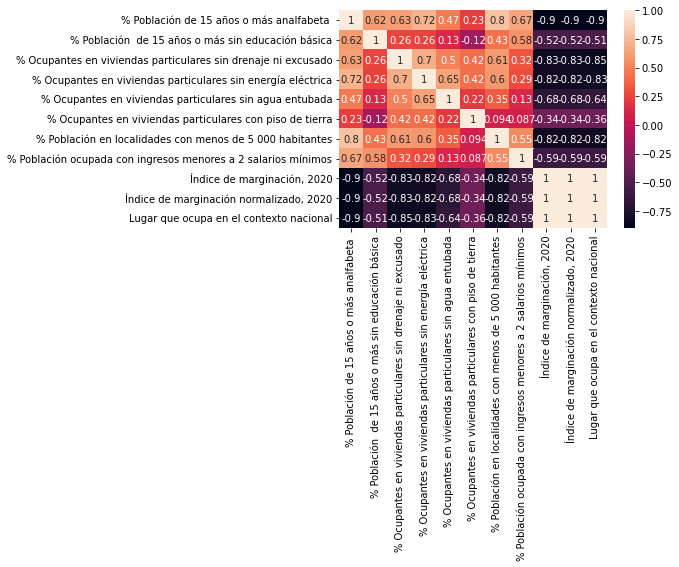

In [ ]:
analisis_guanajuato.showCorrelation2020()

#### Correlacion 1990 a 2015

Podemos ver cómo se correlacionan las variables de otros años.

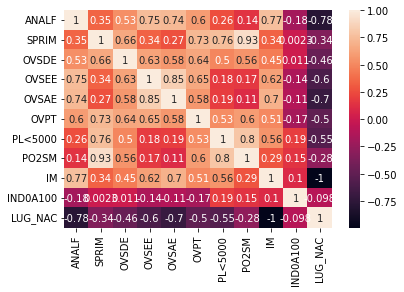

In [ ]:
analisis_guanajuato.showCorrelation1990_2015()

#### Reduccion de dimensiones y agrupamiento 2020

En este punto, la intención es colorear las ciudades de acuerdo a su grado de marginación, según la data del gobierno.

In [ ]:
colores = []
for idx, name in enumerate(analisis_guanajuato.municipios_2020[0]):
  if analisis_guanajuato.marginacion_2020[0].iloc[idx] == 'Muy bajo':
    colores.append('blue')
  if analisis_guanajuato.marginacion_2020[0].iloc[idx] == 'Bajo':
    colores.append('green')
  if analisis_guanajuato.marginacion_2020[0].iloc[idx] == 'Medio':
    colores.append('yellow')
  if analisis_guanajuato.marginacion_2020[0].iloc[idx] == 'Alto':
    colores.append('orange')
  if analisis_guanajuato.marginacion_2020[0].iloc[idx] == 'Muy Alto':
    colores.append('red')

colores2 = ['blue', 'green', 'yellow', 'orange', 'red']


Aplicamos nuestro propio agrupamiento y coloreamos las ciudades según este.

In [ ]:
kmeans_2020 = analisis_guanajuato.genKMeans(4, True)

##### PCA agrupado por grado de marginación

Aplicamos un Análisis de Componentes Principales a la información de nuestra base de datos, proyectamos y coloreamos de acuerdo al grado de marginación según el gobierno.

Podemos observar que las ciudades quedan perfectamente agrupadas según su grado de marginación. De mayor marginación a menor, de derecha hacia izquierda respectivamente.

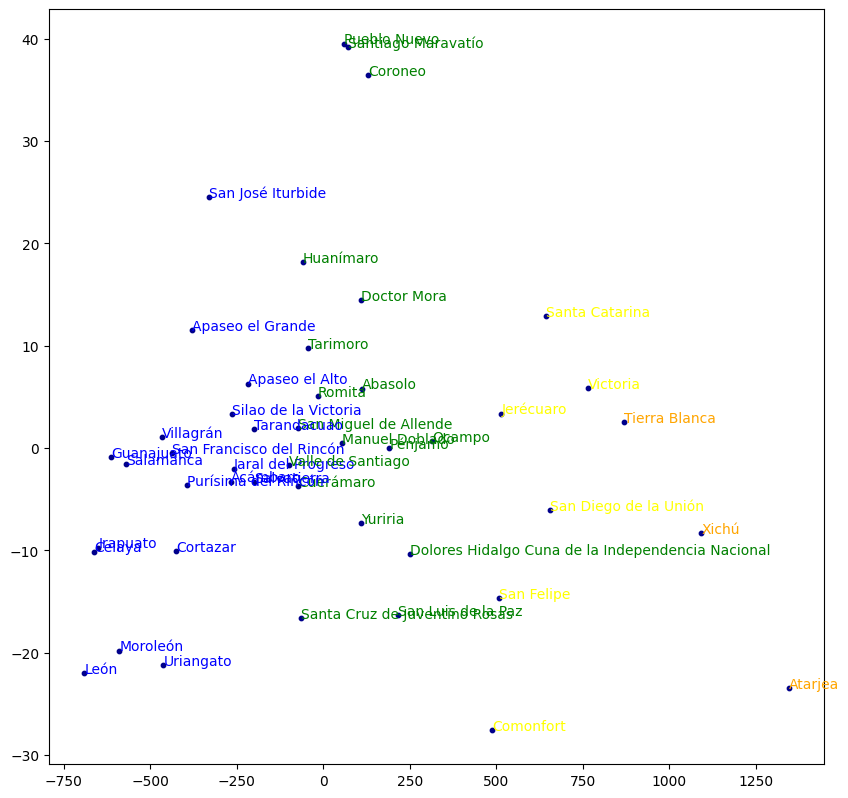

In [ ]:
pca_2020 = analisis_guanajuato.genPCA(2, True)

plt.figure(figsize=(10,10), dpi=100)
plt.scatter(pca_2020[:,0], pca_2020[:,1], 10, color = "darkblue")

for idx, name in enumerate(analisis_guanajuato.municipios_2020[0]):
  coord_x = pca_2020[idx][0]
  coord_y = pca_2020[idx][1]
  plt.annotate(name, (coord_x,coord_y), color = colores[idx])

##### PCA agrupado por K-Means

Con nuestro agrupamiento usando K-Means, las ciudades también quedan bien agrupadas. De mayor marginación a menor, de derecha hacia izquierda respectivamente.

Se observan pocas diferencias, como la ciudad de Tierra Blanca, pero eso se debe a que su grado de marginación se encuentra cerca de una frontera.

Podemos concluir en este caso que ambos agrupamientos son muy similares.

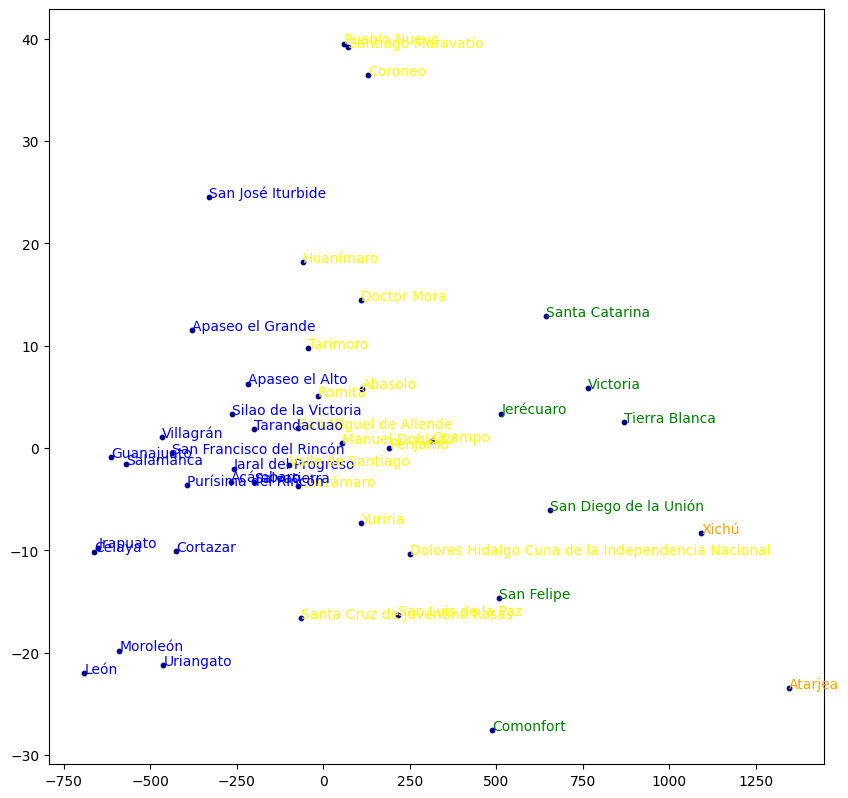

In [ ]:
plt.figure(figsize=(10,10), dpi=100)
plt.scatter(pca_2020[:,0], pca_2020[:,1], 10, color = "darkblue")

for idx, name in enumerate(analisis_guanajuato.municipios_2020[0]):
  coord_x = pca_2020[idx][0]
  coord_y = pca_2020[idx][1]
  plt.annotate(name, (coord_x,coord_y), color = colores2[ kmeans_2020[idx] ])

A continuación se muestran análisis usando Isomap y T-SNE, y llegamos a las mismas conclusiones que usando PCA.

##### Isomap agrupado por grado de marginación

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


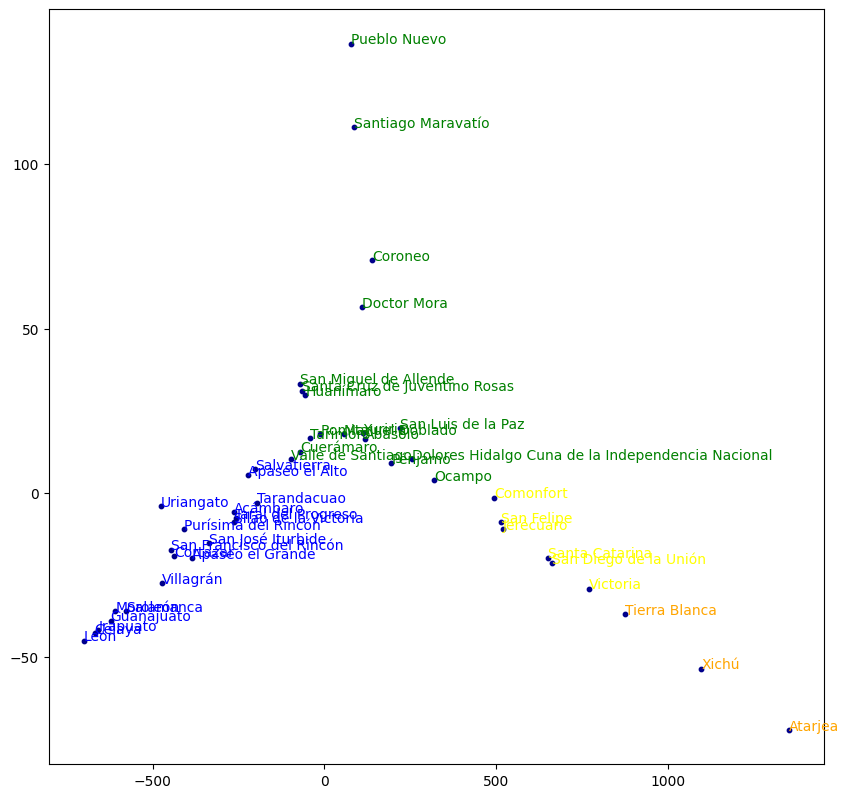

In [ ]:
isomap_2020 = analisis_guanajuato.genISOMAP(5, 2, True)

plt.figure(figsize=(10,10), dpi=100)
plt.scatter(isomap_2020[:,0], isomap_2020[:,1], 10, color = "darkblue")

for idx, name in enumerate(analisis_guanajuato.municipios_2020[0]):
  coord_x = isomap_2020[idx][0]
  coord_y = isomap_2020[idx][1]
  plt.annotate(name, (coord_x,coord_y), color = colores[idx])

##### Isomap agrupado por K-Means

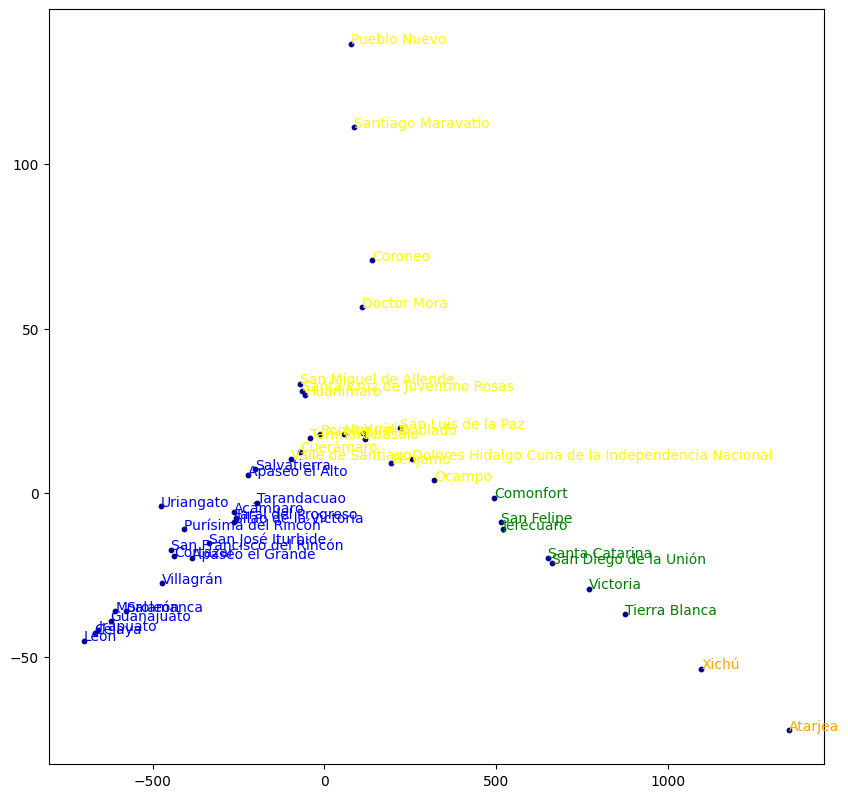

In [ ]:
plt.figure(figsize=(10,10), dpi=100)
plt.scatter(isomap_2020[:,0], isomap_2020[:,1], 10, color = "darkblue")

for idx, name in enumerate(analisis_guanajuato.municipios_2020[0]):
  coord_x = isomap_2020[idx][0]
  coord_y = isomap_2020[idx][1]
  plt.annotate(name, (coord_x,coord_y),  color = colores2[ kmeans_2020[idx] ])

##### T-SNE agrupado por grado de marginación

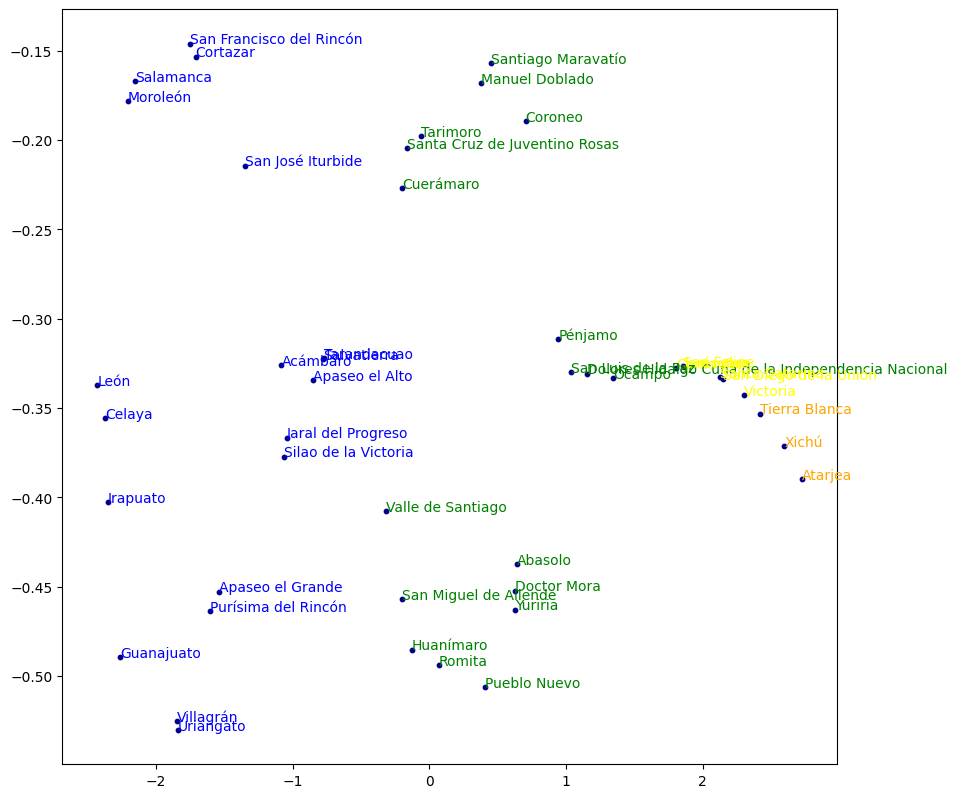

In [ ]:
tsne_2020 = analisis_guanajuato.genTSNE(2, True)

plt.figure(figsize=(10,10), dpi=100)
plt.scatter(tsne_2020[:,0], tsne_2020[:,1], 10, color = "darkblue")

for idx, name in enumerate(analisis_guanajuato.municipios_2020[0]):
  coord_x = tsne_2020[idx][0]
  coord_y = tsne_2020[idx][1]
  plt.annotate(name, (coord_x,coord_y), color = colores[idx])

##### T-SNE agrupado por K-Means

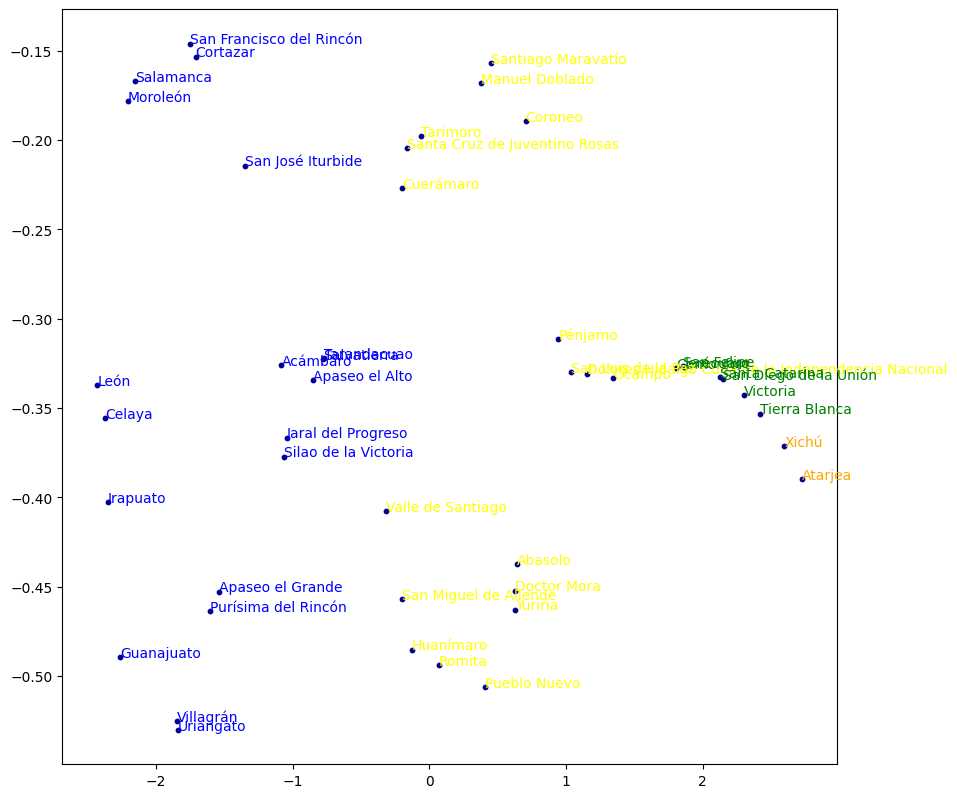

In [ ]:
plt.figure(figsize=(10,10), dpi=100)
plt.scatter(tsne_2020[:,0], tsne_2020[:,1], 10, color = "darkblue")

for idx, name in enumerate(analisis_guanajuato.municipios_2020[0]):
  coord_x = tsne_2020[idx][0]
  coord_y = tsne_2020[idx][1]
  plt.annotate(name, (coord_x,coord_y), color = colores2[ kmeans_2020[idx] ])

#### Reduccion de dimensiones y agrupamiento de 1990 a 2015

Esta data es considerablemente mayor que la del año 2020 debido a que se repite información de los municipios, para diferentes años.

In [ ]:
colores = []
for idx, name in enumerate(analisis_guanajuato.municipios_1990_2015[0]):
  if analisis_guanajuato.marginacion_1990_2015[0].iloc[idx] == 'Muy bajo':
    colores.append('blue')
    continue
  if analisis_guanajuato.marginacion_1990_2015[0].iloc[idx] == 'Bajo':
    colores.append('green')
    continue
  if analisis_guanajuato.marginacion_1990_2015[0].iloc[idx] == 'Medio':
    colores.append('yellow')
    continue
  if analisis_guanajuato.marginacion_1990_2015[0].iloc[idx] == 'Alto':
    colores.append('orange')
    continue
  if analisis_guanajuato.marginacion_1990_2015[0].iloc[idx] == 'Muy Alto' or analisis_guanajuato.marginacion_1990_2015[0].iloc[idx] == 'Muy alto':
    colores.append('red')
    continue

colores2 = ['blue', 'green', 'yellow', 'orange', 'red']


In [ ]:
kmeans_1990_2015 = analisis_guanajuato.genKMeans(5, False)

##### PCA agrupado por grado de marginación

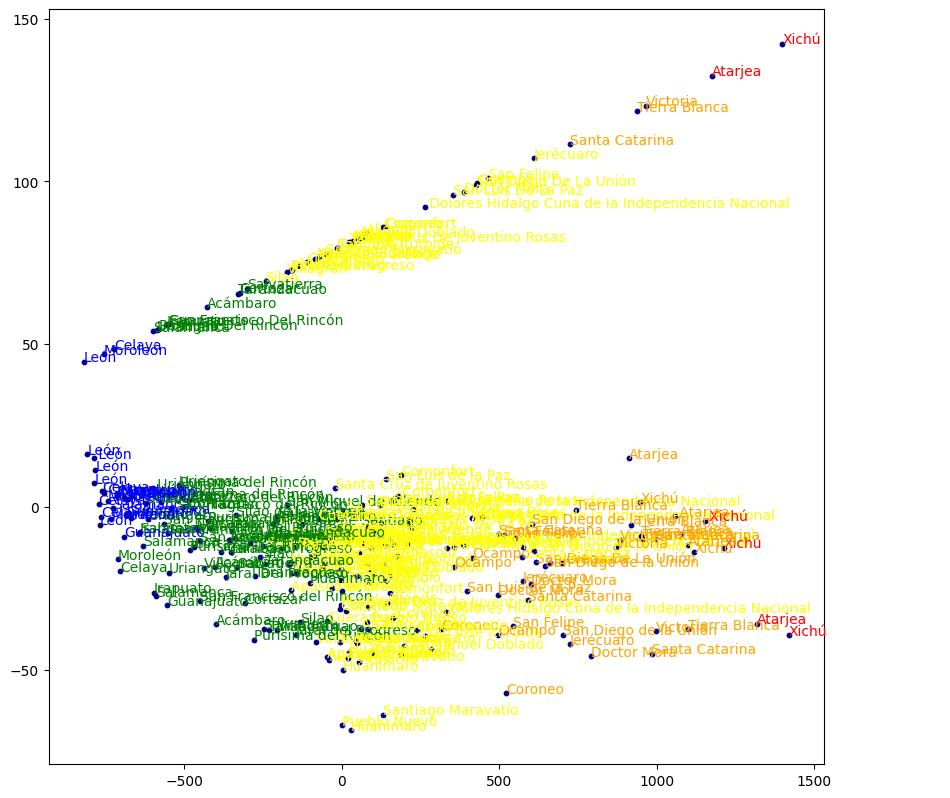

In [ ]:
pca_1990_2015 = analisis_guanajuato.genPCA(2, False)

plt.figure(figsize=(10,10), dpi=100)
plt.scatter(pca_1990_2015[:,0], pca_1990_2015[:,1], 10, color = "darkblue")

for idx, name in enumerate(analisis_guanajuato.municipios_1990_2015[0]):
  coord_x = pca_1990_2015[idx][0]
  coord_y = pca_1990_2015[idx][1]
  plt.annotate(name, (coord_x,coord_y), color = colores[ idx ])

##### PCA agrupado por K-Means

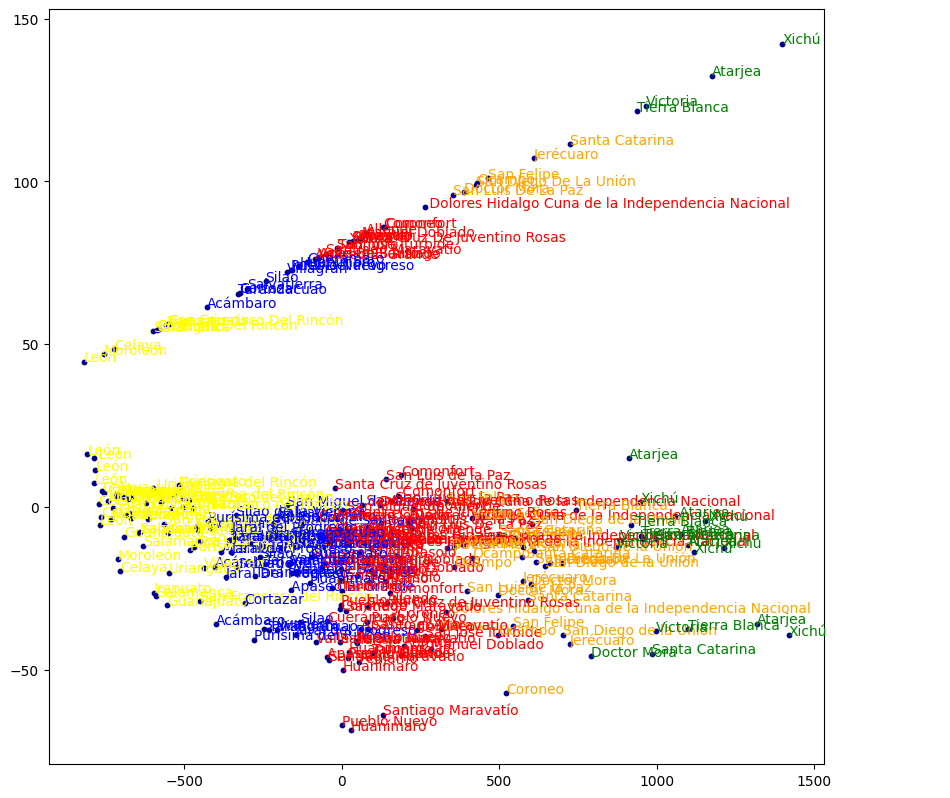

In [ ]:
plt.figure(figsize=(10,10), dpi=100)
plt.scatter(pca_1990_2015[:,0], pca_1990_2015[:,1], 10, color = "darkblue")

for idx, name in enumerate(analisis_guanajuato.municipios_1990_2015[0]):
  coord_x = pca_1990_2015[idx][0]
  coord_y = pca_1990_2015[idx][1]
  plt.annotate(name, (coord_x,coord_y), color = colores2[ kmeans_1990_2015[idx] ])

##### Isomap agrupado por grado de marginación

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


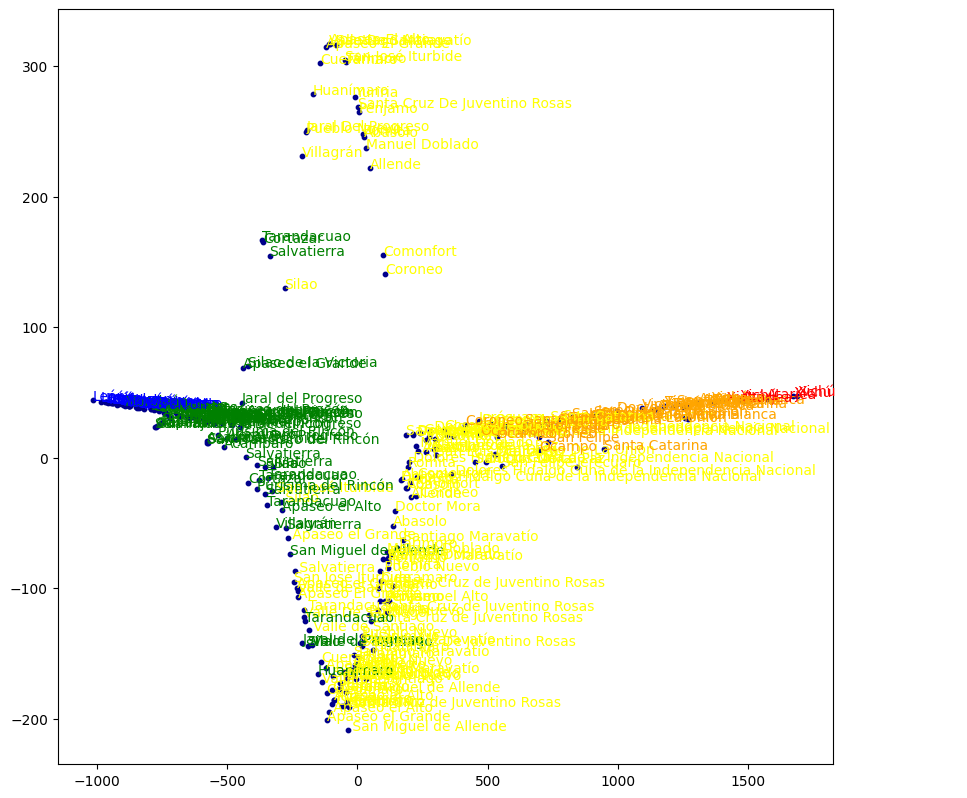

In [ ]:
isomap_1990_2015 = analisis_guanajuato.genISOMAP(5, 2, False)

plt.figure(figsize=(10,10), dpi=100)
plt.scatter(isomap_1990_2015[:,0], isomap_1990_2015[:,1], 10, color = "darkblue")

for idx, name in enumerate(analisis_guanajuato.municipios_1990_2015[0]):
  coord_x = isomap_1990_2015[idx][0]
  coord_y = isomap_1990_2015[idx][1]
  plt.annotate(name, (coord_x,coord_y), color = colores[idx])

##### Isomap agrupado por K-Means

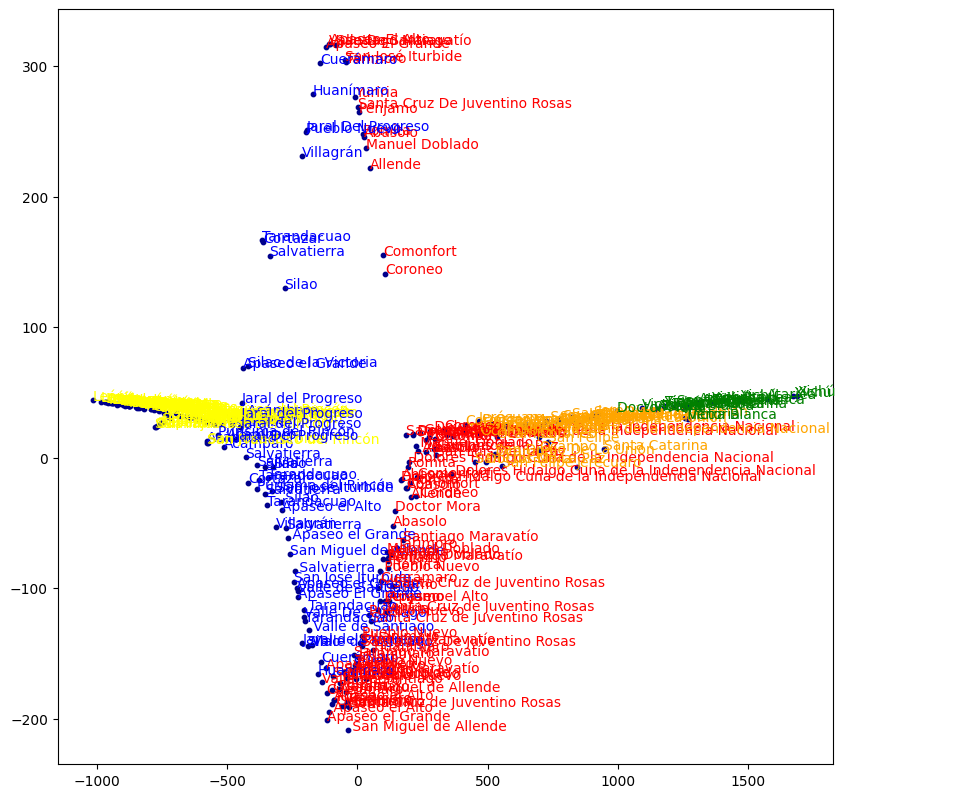

In [ ]:
plt.figure(figsize=(10,10), dpi=100)
plt.scatter(isomap_1990_2015[:,0], isomap_1990_2015[:,1], 10, color = "darkblue")

for idx, name in enumerate(analisis_guanajuato.municipios_1990_2015[0]):
  coord_x = isomap_1990_2015[idx][0]
  coord_y = isomap_1990_2015[idx][1]
  plt.annotate(name, (coord_x,coord_y), color = colores2[ kmeans_1990_2015[idx] ])

##### T-SNE agrupado por grado de marginación

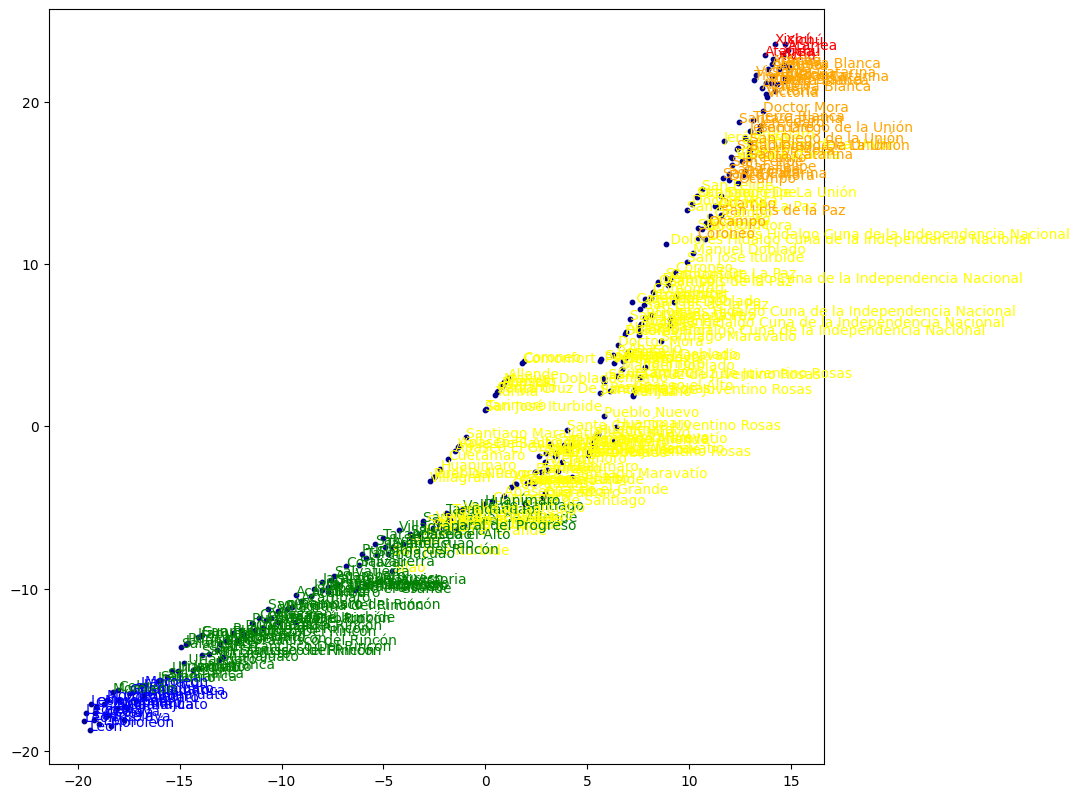

In [ ]:
tsne_1990_2015 = analisis_guanajuato.genTSNE(2, False)

plt.figure(figsize=(10,10), dpi=100)
plt.scatter(tsne_1990_2015[:,0], tsne_1990_2015[:,1], 10, color = "darkblue")

for idx, name in enumerate(analisis_guanajuato.municipios_1990_2015[0]):
  coord_x = tsne_1990_2015[idx][0]
  coord_y = tsne_1990_2015[idx][1]
  plt.annotate(name, (coord_x,coord_y), color = colores[idx])

##### T-SNE agrupado por K-Means

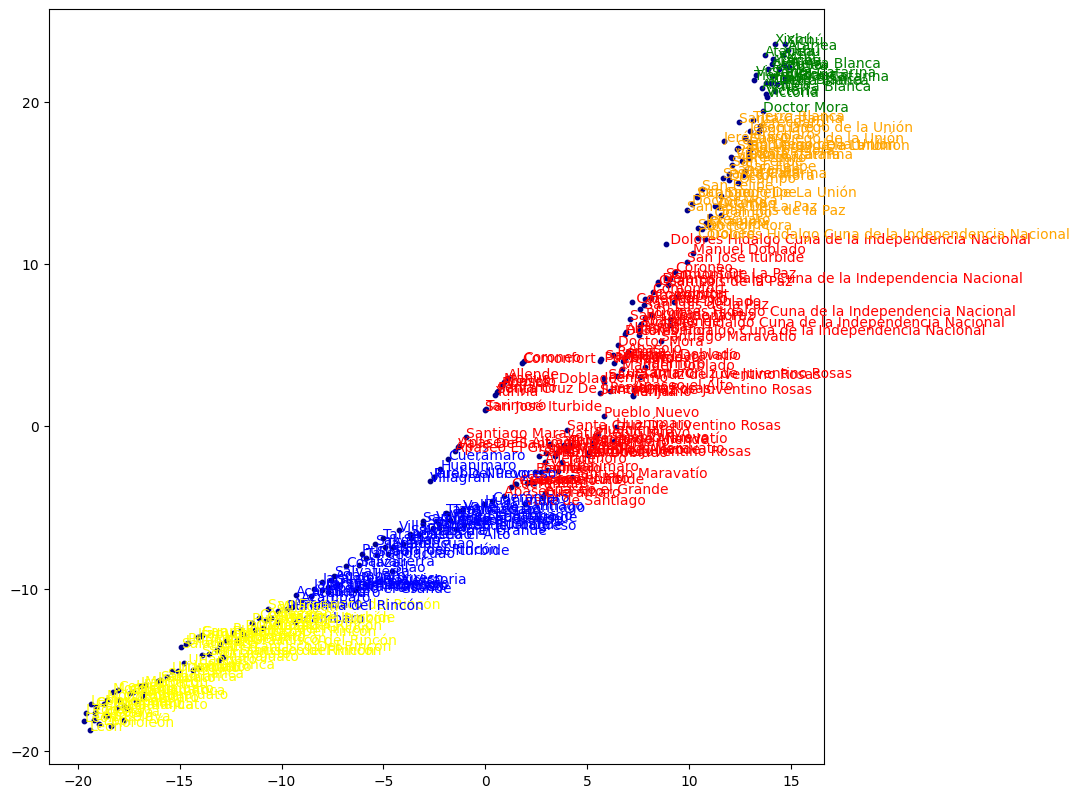

In [ ]:
plt.figure(figsize=(10,10), dpi=100)
plt.scatter(tsne_1990_2015[:,0], tsne_1990_2015[:,1], 10, color = "darkblue")

for idx, name in enumerate(analisis_guanajuato.municipios_1990_2015[0]):
  coord_x = tsne_1990_2015[idx][0]
  coord_y = tsne_1990_2015[idx][1]
  plt.annotate(name, (coord_x,coord_y), color = colores2[ kmeans_1990_2015[idx] ])

## Conclusiones

* De la matriz de correlacion podemos observar que la variable del porcentaje de personas analfabetas mayores a 15 años está fuertemente relacionada con
  * El porcentaje de la poblacion mayor a 15 años sin educacion primaria
  * El porcentaje de ocupantes en viviendas particulares sin drenaje ni excusado
  * El porcentaje de ocupantes en viviendas particulares sin energía eléctrica
  * El porcentaje de ocupantes en viviendas particulares sin agua entubada
  * El porcentaje de la población ocupada con ingresos menores a 2 salarios mínimos

* Comparando los resultados obtenidos con el grado de marginación según la data del gobierno, podemos observar muy pocas diferencias, por lo que podemos concluir que esta información es altamente fiable.

* Se observan más discrepancias en la data de 1990-2015. Es probable que en parte sea debido al volumen de los datos. Sin embargo, la idea general sigue siendo la misma, por lo que únicamente cambia el rango para decidir el grupo al que pertenece cada municipio. Y esto a su vez es debido a que, como se mencionó al inicio, nuestro análisis es relativo a los niveles de pobreza de los demás municipios.